In [1]:
import random

import matplotlib.pyplot as plt
from scipy.special import comb

import dataset
import bezier_spline
import bezier_ga

random.seed(0)

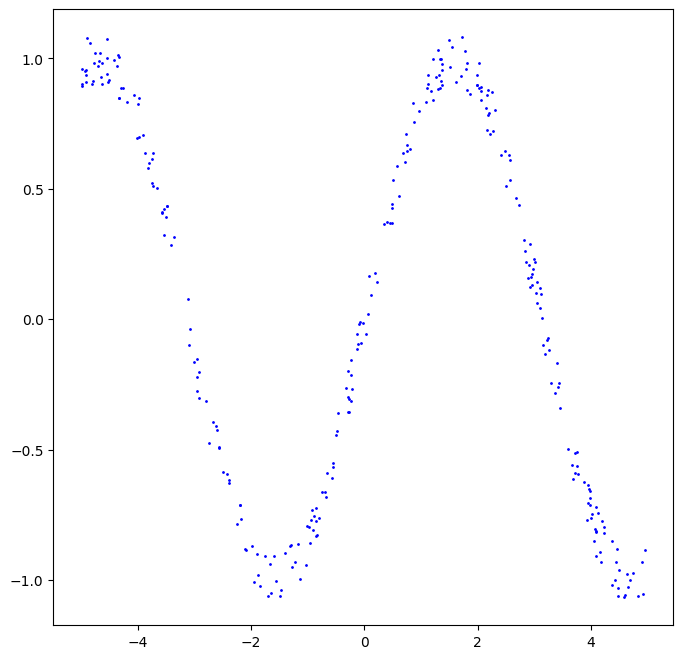

In [2]:
S = dataset.TrigonDataset() #MagmanDataset()
S.sample(size=300, noise=0.1)
S.plot()

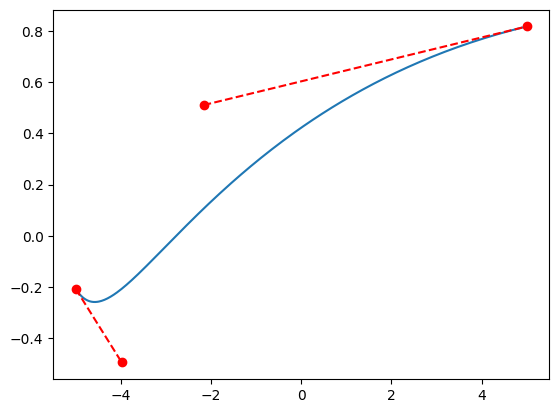

In [3]:
#spline = bezier_spline.BezierCurveConnector(S.xl, 0.)
#for _ in range(1):
#    spline.connect(bezier_spline.BezierCurve())

spline = bezier_spline.BezierCurve()
spline.fixnode(1, 'x', -5.)
spline.fixnode(4, 'x',  5.)
#spline.bindnode(3, 2, 'x')
#spline.bindnode(3, 2, 'y')

bezier_ga.__spline = spline
bezier_ga.__S = S
chromo = bezier_ga.__create_initial_population(1).tolist()[0]
spline.set_chromo(chromo)
spline.plot()

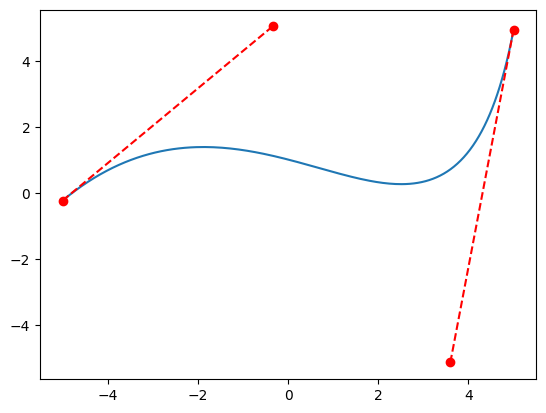

In [4]:
import numpy as np
for _ in range(1000):
    offspring = np.array([spline.get_chromo()])
    mutated_offspring = bezier_ga.__mutation_func(offspring, None)
    spline.set_chromo(mutated_offspring[0])
spline.plot()

Generation = 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Parameters of the best solution : [-0.01352418  2.56005663  2.66815939  2.63845347 -0.85136536 -1.05495148]
Fitness value of the best solution = 3037000499.97605
Predicted output based on the best solution : 35.680970842144276


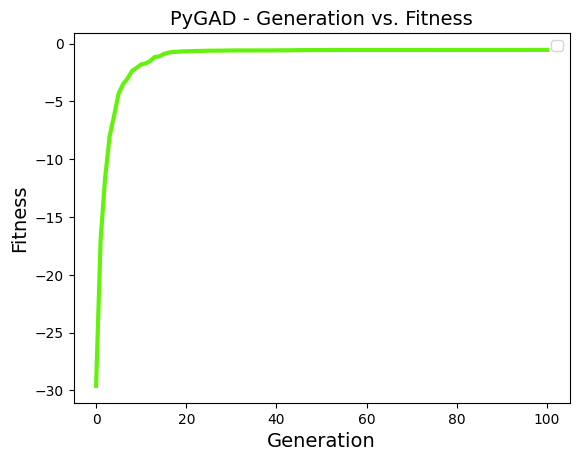

In [5]:
#bezier_ga.fit_spline(spline, S)
spline = bezier_ga.fit_spline_local(S)

-2.0546968361977287

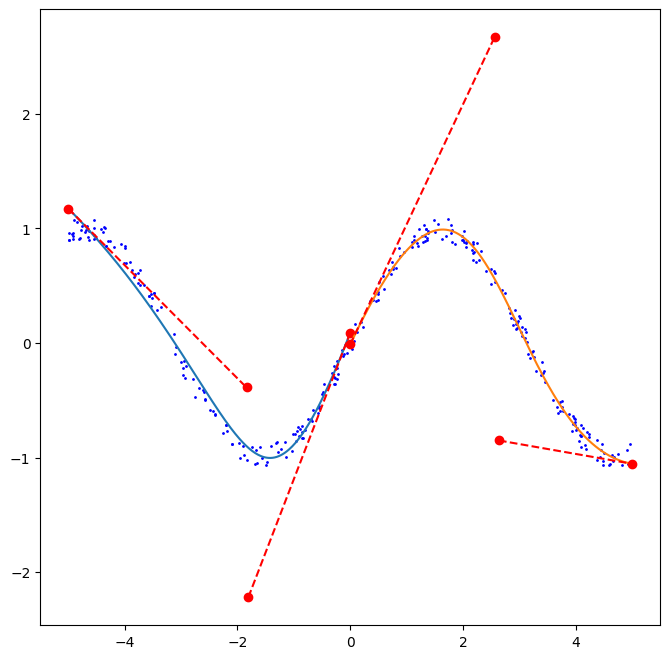

In [6]:
S.plot()
spline.plot()
spline.fitness(S)